# Exercise 4: How many clusters of grain?

In the video, you learnt how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

**Step 1:** Load the dataset _(written for you)_.

In [7]:
import pandas as pd
import seaborn as sns

seeds_df = pd.read_csv('../datasets/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [2]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [3]:
samples = seeds_df.values

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [4]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

In [43]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


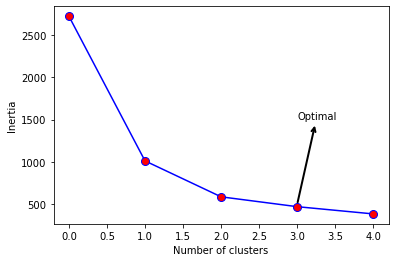

In [49]:
fig, ax = plt.subplots()
ax.plot(inertias, color='b', linestyle='-', marker='o', markerfacecolor='r', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
ax.annotate('Optimal', xy=(3,500),xytext=(3, 1500), arrowprops=dict(arrowstyle='<-', color='k', linewidth=2))
#colors=["crimson", "limegreen", "gold", "indigo"]

#def update(i):
#    c = colors[i%len(colors)]
#    an.arrow_patch.set_color(c)

#ani = animation.FuncAnimation(fig, update, 10, interval=1000, repeat=True)
plt.show() 

**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.

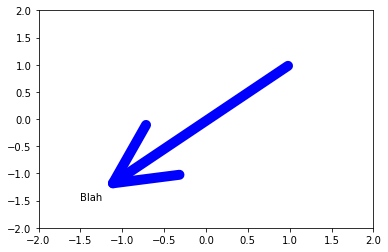

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.axis([-2,2,-2,2])

arrowprops=dict(arrowstyle='<-', color='blue', linewidth=10, mutation_scale=150)
an = ax.annotate('Blah', xy=(1, 1), xytext=(-1.5, -1.5), xycoords='data', 
                 textcoords='data', arrowprops=arrowprops)

colors=["crimson", "limegreen", "gold", "indigo"]
def update(i):
    c = colors[i%len(colors)]
    an.arrow_patch.set_color(c)

ani = animation.FuncAnimation(fig, update, 10, interval=1000, repeat=True)
plt.show()